## ETL, Analysis, and Visualizationn 
### Daria Tkach

To solve this task we need to do next steps:

- Prepare or identify our data
- Connect to MySQL and create a database
- Create a table and Import the CSV data into the MySQL database
- Check data in database
- Write SQL queries directly in the MySQL Workbench to analyzing the MRTS database
- Draw a grafics and analize their
- Close connection
- Make a conclusion

### Loading data from CSV files
First of all were loded data from CSV files. This files were exprted from Excel file 'mrtssales92-present.xls'.
This file contain information about Estimates of Monthly Retail and Food Services Sales by Kind of Business from 1992 to 2021 year.
To analise were choosen 2018, 2019 and 2020 years and prepare data to export in CSV files.
First of all we create DataFrame and observe it to check data. 

In [660]:
# create a DataFrame
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from matplotlib.dates import (YEARLY, DateFormatter,
#                              rrulewrapper, RRuleLocator, drange)

data_2020 = '2020.csv'
table_2020 = pd.read_csv(data_2020, delimiter=';')
# make useful titles
table_2020.columns = table_2020.columns.str.lower().str.replace(' ', '_').str.replace(',', '')

data_2019 = '2019.csv'
table_2019 = pd.read_csv(data_2019, delimiter=';')
table_2019.columns = table_2019.columns.str.lower().str.replace(' ', '_').str.replace(',', '')

data_2018 = '2018.csv'
table_2018 = pd.read_csv(data_2018, delimiter=';')
table_2018.columns = table_2018.columns.str.lower().str.replace(' ', '_').str.replace(',', '')

table_2018.head()

,date,retail_and_food_services_sales_total,retail_sales_and_food_services_excl_motor_vehicle_and_parts,retail_sales_and_food_services_excl_gasoline_stations,retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations,retail_sales_total,retail_sales_total_(excl._motor_vehicle_and_parts_dealers),motor_vehicle_and_parts_dealers,automobile_and_other_motor_vehicle_dealers,automobile_dealers,...,gift_novelty_and_souvenir_stores,used_merchandise_stores,nonstore_retailers,electronic_shopping_and_mail-order_houses,fuel_dealers,food_services_and_drinking_places,drinking_places,restaurants_and_other_eating_places,full_service_restaurants,limited_service_eating_places
0,2018-01-01,444286,356043,405332,317089,389808,301565,88243,81003,76900,...,1077,1313,53006,43140,5831,54478,2033,47791,24145,23646
1,2018-02-01,435373,345645,398494,308766,380671,290943,89728,82701,77775,...,1184,1366,48632,40701,3807,54702,2009,47531,24068,23463
2,2018-03-01,508383,398623,466197,356437,444994,335234,109760,101441,94586,...,1361,1544,54589,46222,3582,63389,0,55287,27766,27521
3,2018-04-01,480373,380907,437800,338334,420245,320779,99466,91695,84366,...,1334,1437,52528,45015,2818,60128,0,52178,25987,26191
4,2018-05-01,527991,418752,480549,371310,464050,354811,109239,100854,92690,...,1605,1495,55618,48188,2211,63941,0,55905,27820,28085


At first look all data were correct, but when we checked data we understand that numeric data in columns had type "object".
After that I realised that in SCV files we had "space" columns with numbers. Changing format in Excel file solved this problem.
I did addition checking and when realised that all is OK sterted creating script to loading database.

In [661]:
#check data types
table_2020.dtypes
#table_2020.info()
#table_2020.isnull().sum()

date                                                                                 object
retail_and_food_services_sales_total                                                  int64
retail_sales_and_food_services_excl_motor_vehicle_and_parts                           int64
retail_sales_and_food_services_excl_gasoline_stations                                 int64
retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations     int64
                                                                                      ...  
food_services_and_drinking_places                                                     int64
drinking_places                                                                       int64
restaurants_and_other_eating_places                                                   int64
full_service_restaurants                                                              int64
limited_service_eating_places                                                   

### Connect to MySQL and create a database
Here we connect to MySQL and create Database.
To better understanding created messages.

In [662]:
# Create a connection object to connect to MySQL

from distutils.command.config import config
import mysql.connector as msql
from mysql.connector import Error

try:                    # use 'try: ... exept' to catch an excludes
    #give ur username, password
    mydb = msql.connect(
        host = 'localhost',
        user = 'root',
        passwd = '*********'    
    ) 
    if mydb.is_connected():
        cursor = mydb.cursor(buffered=True)
        cursor.execute("CREATE DATABASE if not exists mrts")
        print("Database is created")
except Error as e:
    print("Error while connecting to MySQL", e)

Database is created


### Create a table and Import the CSV data into the MySQL database
To create tables we need write all columns in the query.
In this case we had 65 columns. Here we created 3 tables and inserted data.

In [663]:
# Create a table and Import the CSV data into the MySQL table

try:
    mydb = msql.connect(
        host = 'localhost',
        user = 'root',
        passwd = 'podvipilis',
        database='mrts',
        consume_results=True    
    ) 
    if mydb.is_connected():
        cursor = mydb.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)

        cursor.execute('DROP TABLE IF EXISTS year_2020;')   
        cursor.execute('DROP TABLE IF EXISTS year_2019;')   
        cursor.execute('DROP TABLE IF EXISTS year_2018;')   
        print('Creating table....')
# in the below line please pass the create table statement which you want #to create

        create_table_2020 = """
            CREATE TABLE year_2020(
                date DATE NULL,
                retail_and_food_services_sales_total INT NULL,
                retail_sales_and_food_services_excl_motor_vehicle_and_parts INT NULL,
                retail_sales_and_food_services_excl_gasoline_stations INT NULL,
                retail_sales_and_food_services_excl_motor_vehicle_and_other INT NULL,
                retail_sales_total INT NULL,
                retail_sales_total_excl_motor_vehicle_and_parts_dealers INT NULL,
                motor_vehicle_and_parts_dealers INT NULL,
                automobile_and_other_motor_vehicle_dealers INT NULL,
                automobile_dealers INT NULL,
                new_car_dealers INT NULL,
                used_car_dealers INT NULL,
                automotive_parts_acc_and_tire_stores INT NULL,
                furniture_home_furn_electronics_and_appliance_stores INT NULL,
                furniture_and_home_furnishings_stores INT NULL,
                furniture_stores INT NULL,
                home_furnishings_stores INT NULL,
                floor_covering_stores INT NULL,
                all_other_home_furnishings_stores INT NULL,
                electronics_and_appliance_stores INT NULL,
                household_appliance_stores INT NULL,
                electronics_stores INT NULL,
                building_mat_and_garden_equip_and_supplies_dealers INT NULL,
                building_mat_and_supplies_dealers INT NULL,
                paint_and_wallpaper_stores INT NULL,
                hardware_stores INT NULL,
                food_and_beverage_stores INT NULL,
                grocery_stores INT NULL,
                supermarkets_and_other_grocery_except_convenience_stores INT NULL,
                beer_wine_and_liquor_stores INT NULL,
                health_and_personal_care_stores INT NULL,
                pharmacies_and_drug_stores INT NULL,
                gasoline_stations INT NULL,
                clothing_and_clothing_access_stores INT NULL,
                clothing_stores INT NULL,
                mens_clothing_stores INT NULL,
                womens_clothing_stores INT NULL,
                family_clothing_stores INT NULL,
                other_clothing_stores INT NULL,
                shoe_stores INT NULL,
                jewelry_stores INT NULL,
                sporting_goods_hobby_musical_instrument_and_book_stores INT NULL,
                sporting_goods_stores INT NULL,
                hobby_toy_and_game_stores INT NULL,
                book_stores INT NULL,
                general_merchandise_stores INT NULL,
                department_stores INT NULL,
                department_stores_excl_discount_department_stores INT NULL,
                discount_dept_stores INT NULL,
                other_general_merchandise_stores INT NULL,
                warehouse_clubs_and_superstores INT NULL,
                all_other_gen_merchandise_stores INT NULL,
                miscellaneous_store_retailers INT NULL,
                office_supplies_stationery_and_gift_stores INT NULL,
                office_supplies_and_stationery_stores INT NULL,
                gift_novelty_and_souvenir_stores INT NULL,
                used_merchandise_stores INT NULL,
                nonstore_retailers INT NULL,
                electronic_shopping_and_mail_order_houses INT NULL,
                fuel_dealers INT NULL,
                food_services_and_drinking_places INT NULL,
                drinking_places INT NULL,
                restaurants_and_other_eating_places INT NULL,
                full_service_restaurants INT NULL,
                limited_service_eating_places INT NULL
                )
            """

        create_table_2019 ="CREATE TABLE year_2019(date DATE NULL, retail_and_food_services_sales_total INT NULL, retail_sales_and_food_services_excl_motor_vehicle_and_parts INT NULL, retail_sales_and_food_services_excl_gasoline_stations INT NULL, retail_sales_and_food_services_excl_motor_vehicle_and_other INT NULL, retail_sales_total INT NULL, retail_sales_total_excl_motor_vehicle_and_parts_dealers INT NULL, motor_vehicle_and_parts_dealers INT NULL, automobile_and_other_motor_vehicle_dealers INT NULL, automobile_dealers INT NULL, new_car_dealers INT NULL, used_car_dealers INT NULL, automotive_parts_acc_and_tire_stores INT NULL, furniture_home_furn_electronics_and_appliance_stores INT NULL, furniture_and_home_furnishings_stores INT NULL, furniture_stores INT NULL, home_furnishings_stores INT NULL, floor_covering_stores INT NULL, all_other_home_furnishings_stores INT NULL, electronics_and_appliance_stores INT NULL, household_appliance_stores INT NULL, electronics_stores INT NULL, building_mat_and_garden_equip_and_supplies_dealers INT NULL, building_mat_and_supplies_dealers INT NULL, paint_and_wallpaper_stores INT NULL, hardware_stores INT NULL, food_and_beverage_stores INT NULL, grocery_stores INT NULL, supermarkets_and_other_grocery_except_convenience_stores INT NULL, beer_wine_and_liquor_stores INT NULL, health_and_personal_care_stores INT NULL, pharmacies_and_drug_stores INT NULL, gasoline_stations INT NULL, clothing_and_clothing_access_stores INT NULL, clothing_stores INT NULL, mens_clothing_stores INT NULL,  womens_clothing_stores INT NULL, family_clothing_stores INT NULL, other_clothing_stores INT NULL, shoe_stores INT NULL, jewelry_stores INT NULL, sporting_goods_hobby_musical_instrument_and_book_stores INT NULL, sporting_goods_stores INT NULL, hobby_toy_and_game_stores INT NULL, book_stores INT NULL, general_merchandise_stores INT NULL, department_stores INT NULL, department_stores_excl_discount_department_stores INT NULL, discount_dept_stores INT NULL, other_general_merchandise_stores INT NULL, warehouse_clubs_and_superstores INT NULL, all_other_gen_merchandise_stores INT NULL, miscellaneous_store_retailers INT NULL, office_supplies_stationery_and_gift_stores INT NULL, office_supplies_and_stationery_stores INT NULL,   gift_novelty_and_souvenir_stores INT NULL, used_merchandise_stores INT NULL, nonstore_retailers INT NULL, electronic_shopping_and_mail_order_houses INT NULL, fuel_dealers INT NULL, food_services_and_drinking_places INT NULL, drinking_places INT NULL, restaurants_and_other_eating_places INT NULL, full_service_restaurants INT NULL, limited_service_eating_places INT NULL)"

        create_table_2018 ="CREATE TABLE year_2018(date DATE NULL, retail_and_food_services_sales_total INT NULL, retail_sales_and_food_services_excl_motor_vehicle_and_parts INT NULL, retail_sales_and_food_services_excl_gasoline_stations INT NULL, retail_sales_and_food_services_excl_motor_vehicle_and_other INT NULL, retail_sales_total INT NULL, retail_sales_total_excl_motor_vehicle_and_parts_dealers INT NULL, motor_vehicle_and_parts_dealers INT NULL, automobile_and_other_motor_vehicle_dealers INT NULL, automobile_dealers INT NULL, new_car_dealers INT NULL, used_car_dealers INT NULL, automotive_parts_acc_and_tire_stores INT NULL, furniture_home_furn_electronics_and_appliance_stores INT NULL, furniture_and_home_furnishings_stores INT NULL, furniture_stores INT NULL, home_furnishings_stores INT NULL, floor_covering_stores INT NULL, all_other_home_furnishings_stores INT NULL, electronics_and_appliance_stores INT NULL, household_appliance_stores INT NULL, electronics_stores INT NULL, building_mat_and_garden_equip_and_supplies_dealers INT NULL, building_mat_and_supplies_dealers INT NULL, paint_and_wallpaper_stores INT NULL, hardware_stores INT NULL, food_and_beverage_stores INT NULL, grocery_stores INT NULL, supermarkets_and_other_grocery_except_convenience_stores INT NULL, beer_wine_and_liquor_stores INT NULL, health_and_personal_care_stores INT NULL, pharmacies_and_drug_stores INT NULL, gasoline_stations INT NULL, clothing_and_clothing_access_stores INT NULL, clothing_stores INT NULL, mens_clothing_stores INT NULL,  womens_clothing_stores INT NULL, family_clothing_stores INT NULL, other_clothing_stores INT NULL, shoe_stores INT NULL, jewelry_stores INT NULL, sporting_goods_hobby_musical_instrument_and_book_stores INT NULL, sporting_goods_stores INT NULL, hobby_toy_and_game_stores INT NULL, book_stores INT NULL, general_merchandise_stores INT NULL, department_stores INT NULL, department_stores_excl_discount_department_stores INT NULL, discount_dept_stores INT NULL, other_general_merchandise_stores INT NULL, warehouse_clubs_and_superstores INT NULL, all_other_gen_merchandise_stores INT NULL, miscellaneous_store_retailers INT NULL, office_supplies_stationery_and_gift_stores INT NULL, office_supplies_and_stationery_stores INT NULL,   gift_novelty_and_souvenir_stores INT NULL, used_merchandise_stores INT NULL, nonstore_retailers INT NULL, electronic_shopping_and_mail_order_houses INT NULL, fuel_dealers INT NULL, food_services_and_drinking_places INT NULL, drinking_places INT NULL, restaurants_and_other_eating_places INT NULL, full_service_restaurants INT NULL, limited_service_eating_places INT NULL)"

        cursor.execute(create_table_2020)
        cursor.execute(create_table_2019)
        cursor.execute(create_table_2018)

        print("Table is created....")

        #loop through the data frame
        for i, row in table_2020.iterrows():
            #here %S means string values 
            sql = "INSERT INTO mrts.year_2020 VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
            cursor.execute(sql, tuple(row))
            print("Record inserted")
            # the connection is not auto committed by default, so we must commit to save our changes
            mydb.commit()         

        for i, row in table_2019.iterrows():
            #here %S means string values 
            sql = "INSERT INTO mrts.year_2019 VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
            cursor.execute(sql, tuple(row))
            print("Record inserted")
            # the connection is not auto committed by default, so we must commit to save our changes
            mydb.commit()   

        for i, row in table_2018.iterrows():
            #here %S means string values 
            sql = "INSERT INTO mrts.year_2018 VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
            cursor.execute(sql, tuple(row))
            print("Record inserted")
            # the connection is not auto committed by default, so we must commit to save our changes
            mydb.commit()   

except Error as e:
    print("Error while connecting to MySQL", e)

You're connected to database:  ('mrts',)
Creating table....
Table is created....
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted


### Check data in database

To check data we wrote the simplest query to see if data correct.
In these case output is not useful for checking that is why we changed our code.
New code output to table. It is very useful and easy to check how correct data in tables in database.

In [664]:
# Query the Table

query = "SELECT * FROM mrts.year_2020"
cursor.execute(query)
# Fetch all the records
result = cursor.fetchall()
for i in result:
    print(i)



(datetime.date(2020, 1, 1), 480301, 386934, 440605, 347238, 418734, 325367, 93367, 85832, 81214, 72074, 9140, 7535, 16569, 9490, 5148, 4342, 0, 2422, 7079, 1230, 5849, 26966, 23709, 928, 2059, 64567, 58722, 56141, 4188, 28987, 24440, 39696, 16873, 12287, 599, 2402, 6899, 1225, 2148, 2141, 5867, 2984, 1174, 990, 53203, 8479, 2146, 6333, 44724, 38811, 5913, 10394, 2037, 963, 1074, 1501, 62245, 53485, 4240, 61567, 0, 54131, 27018, 27113)
(datetime.date(2020, 2, 1), 478467, 380639, 441504, 343676, 415511, 317683, 97828, 90586, 85140, 74360, 10780, 7242, 16139, 9452, 5287, 4165, 0, 2211, 6687, 1234, 5453, 26237, 23025, 920, 1954, 61962, 55870, 53306, 4318, 27756, 23183, 36963, 19232, 13439, 615, 2662, 7535, 1344, 2701, 2751, 5632, 3107, 1200, 593, 54596, 9067, 2473, 6594, 45529, 39451, 6078, 10302, 1953, 816, 1137, 1551, 58864, 50716, 3565, 62956, 0, 54911, 0, 27062)
(datetime.date(2020, 3, 1), 478267, 395880, 444006, 361619, 430527, 348140, 82387, 74904, 68937, 59487, 9450, 7483, 13975, 81

In [665]:
# check data in table
query = 'SELECT * FROM year_2020'
df = pd.read_sql(query, con = mydb)
df.head()

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,date,retail_and_food_services_sales_total,retail_sales_and_food_services_excl_motor_vehicle_and_parts,retail_sales_and_food_services_excl_gasoline_stations,retail_sales_and_food_services_excl_motor_vehicle_and_other,retail_sales_total,retail_sales_total_excl_motor_vehicle_and_parts_dealers,motor_vehicle_and_parts_dealers,automobile_and_other_motor_vehicle_dealers,automobile_dealers,...,gift_novelty_and_souvenir_stores,used_merchandise_stores,nonstore_retailers,electronic_shopping_and_mail_order_houses,fuel_dealers,food_services_and_drinking_places,drinking_places,restaurants_and_other_eating_places,full_service_restaurants,limited_service_eating_places
0,2020-01-01,480301,386934,440605,347238,418734,325367,93367,85832,81214,...,1074,1501,62245,53485,4240,61567,0,54131,27018,27113
1,2020-02-01,478467,380639,441504,343676,415511,317683,97828,90586,85140,...,1137,1551,58864,50716,3565,62956,0,54911,0,27062
2,2020-03-01,478267,395880,444006,361619,430527,348140,82387,74904,68937,...,778,1028,66414,58622,3016,47740,0,42238,0,24159
3,2020-04-01,407227,337693,380417,310883,377210,307676,69534,62554,56635,...,211,420,73022,67339,2069,30017,0,27674,0,20001
4,2020-05-01,504607,397245,472562,365200,462286,354924,107362,98852,88480,...,513,882,78134,72558,1741,42321,0,39803,0,26498


### Write SQL queries directly in the MySQL Workbench to analyzing the MRTS database

To analyze sales in 2018-2020, we will make requests and, based on them, we will build graphs that will allow us to analyze the information contained in the database.
Let's analyze 'retail_and_food_services_sales_total'

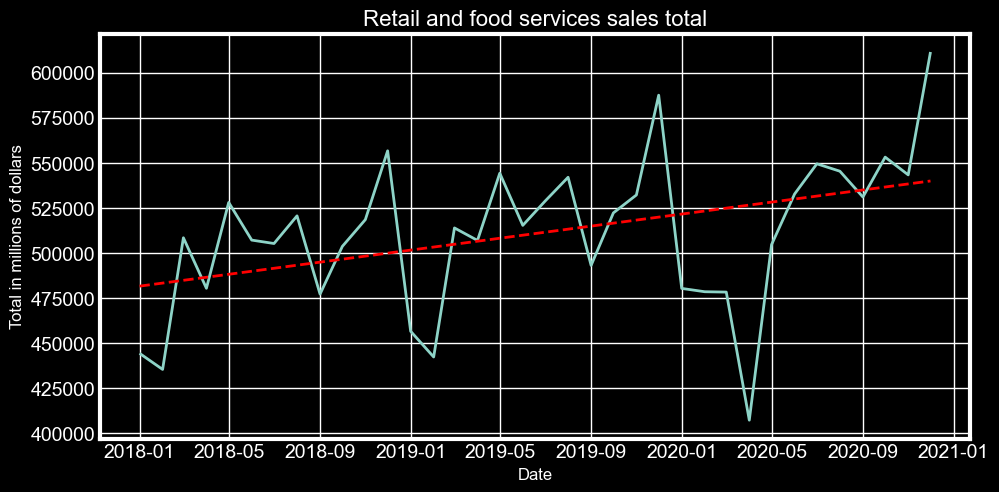

In [666]:
#working with time in table

retail = """
SELECT date, retail_and_food_services_sales_total FROM year_2018
UNION
SELECT date, retail_and_food_services_sales_total FROM year_2019
UNION
SELECT date, retail_and_food_services_sales_total FROM year_2020
ORDER BY date;
"""

cursor.execute(retail)

date = []
sale = []

for row in cursor.fetchall():
    #print(row)
    date.append(row[0])
    sale.append(row[1])

import matplotlib.dates as dates
plt.style.use('dark_background')

#change size of figure
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

plt.title("Retail and food services sales total")
plt.xlabel("Date")
plt.ylabel("Total in millions of dollars")

# Get values for the trend line analysis
x_dates = date
x_num = dates.date2num(x_dates)

# Calculate a fit line
trend = np.polyfit(x_num, sale, 1)
fit = np.poly1d(trend)
#plot the data
plt.plot(date, sale)
#plot the trendline
x_fit = np.linspace(x_num.min(), x_num.max())
plt.plot(dates.num2date(x_fit), fit(x_fit), "r--")


plt.show()


The graph shows that sales are seasonal and fluctuate quite a lot from month to month. The construction of the trend line made it possible to establish that, in general, retail and food services sales are growing.

Let`s compare businesses such as bookstores, sporting goods stores, and hobbies, toys, and games stores.

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


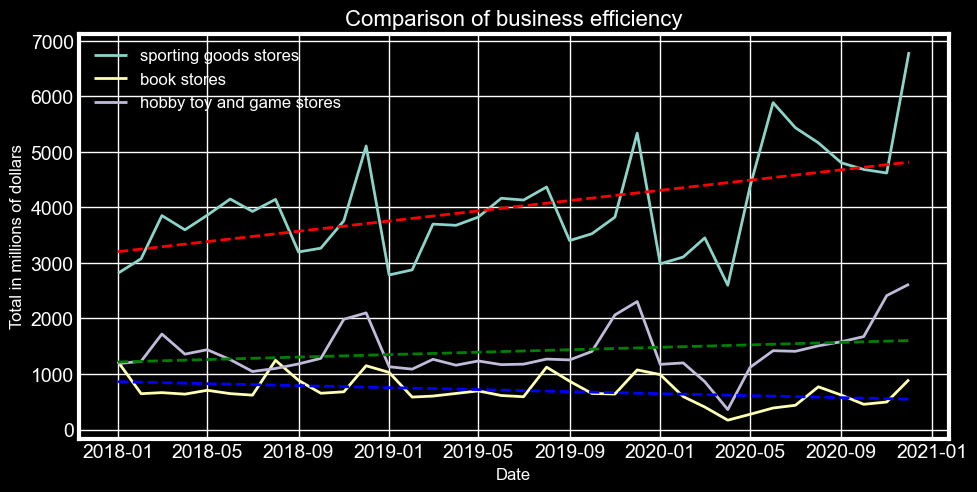

In [667]:
stores = """
SELECT date, sporting_goods_stores, book_stores, hobby_toy_and_game_stores FROM year_2018
UNION
SELECT date, sporting_goods_stores, book_stores, hobby_toy_and_game_stores FROM year_2019
UNION
SELECT date, sporting_goods_stores, book_stores, hobby_toy_and_game_stores FROM year_2020
ORDER BY date;
"""

perc_ch = pd.read_sql(stores, con = mydb)
perc_ch.head()

cursor.execute(stores)

date = []
sport = []
books = []
games = []

for row in cursor.fetchall():
    date.append(row[0])
    sport.append(row[1])
    books.append(row[2])
    games.append(row[3])

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

plt.title("Comparison of business efficiency")
plt.xlabel("Date")
plt.ylabel("Total in millions of dollars")

# Get values for the trend line analysis
x_dates = date
x_num = dates.date2num(x_dates)

# Calculate a fit line
trend1 = np.polyfit(x_num, sport, 1)
fit1 = np.poly1d(trend1)

trend2 = np.polyfit(x_num, books, 1)
fit2 = np.poly1d(trend2)

trend3 = np.polyfit(x_num, games, 1)
fit3 = np.poly1d(trend3)

#plot the data
plt.plot(date, sport, label = 'sporting goods stores')
plt.plot(date, books, label = 'book stores')
plt.plot(date, games, label = 'hobby toy and game stores')

#plot the trendline
x_fit = np.linspace(x_num.min(), x_num.max())
plt.plot(dates.num2date(x_fit), fit1(x_fit), "r--")
plt.plot(dates.num2date(x_fit), fit2(x_fit), "b--")
plt.plot(dates.num2date(x_fit), fit3(x_fit), "g--")

plt.legend(fontsize=12)
plt.show()    

From the graphs obtained, it is also clear that sales are seasonal in nature. Building a trend line allowed us to establish that bookstores are declining sales, sporting goods stores have the highest profit, which is growing every year and quite noticeably, hobbies, toys, and games stores also show some sales growth, but insignificant.

To establish the seasonality of sales, we plot the change in sales as a percentage.

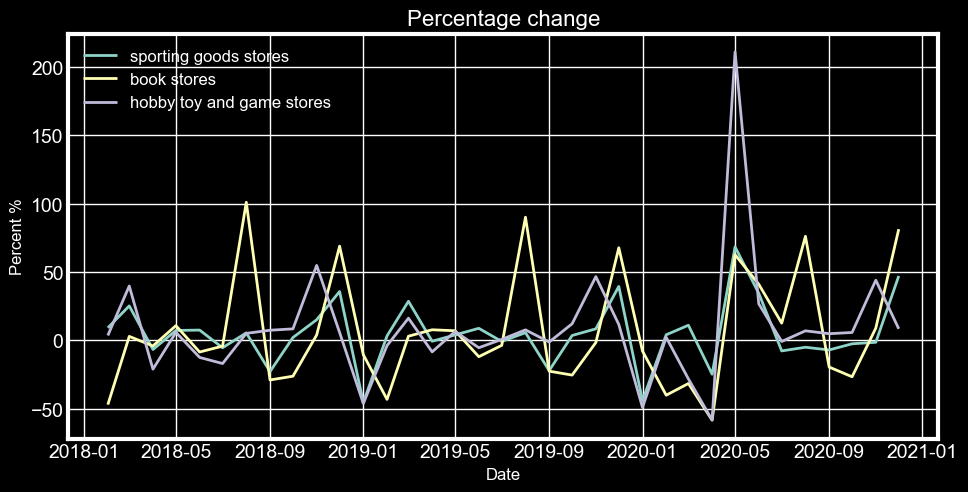

In [668]:
# finding percentage change

perc_ch['sporting_goods_sales_pct_change'] = perc_ch['sporting_goods_stores'].pct_change()
perc_ch['books_sales_pct_change'] = perc_ch['book_stores'].pct_change()
perc_ch['hobby_toy_and_game_sales_pct_change'] = perc_ch['hobby_toy_and_game_stores'].pct_change()

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

plt.title("Percentage change")
plt.xlabel("Date")
plt.ylabel("Percent %")

plt.plot(perc_ch['date'], perc_ch['sporting_goods_sales_pct_change']*100, label = 'sporting goods stores')
plt.plot(perc_ch['date'], perc_ch['books_sales_pct_change']*100, label = 'book stores')
plt.plot(perc_ch['date'], perc_ch['hobby_toy_and_game_sales_pct_change']*100, label = 'hobby toy and game stores')

plt.legend(fontsize=12)
plt.show() 

The resulting graph confirms that sales of reviewed merchandise are highly dependent on the season. For example, sales growth was observed in May, August, November-December, which is probably due to the upcoming holidays.

Consider how seasonality affects clothing sales.

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


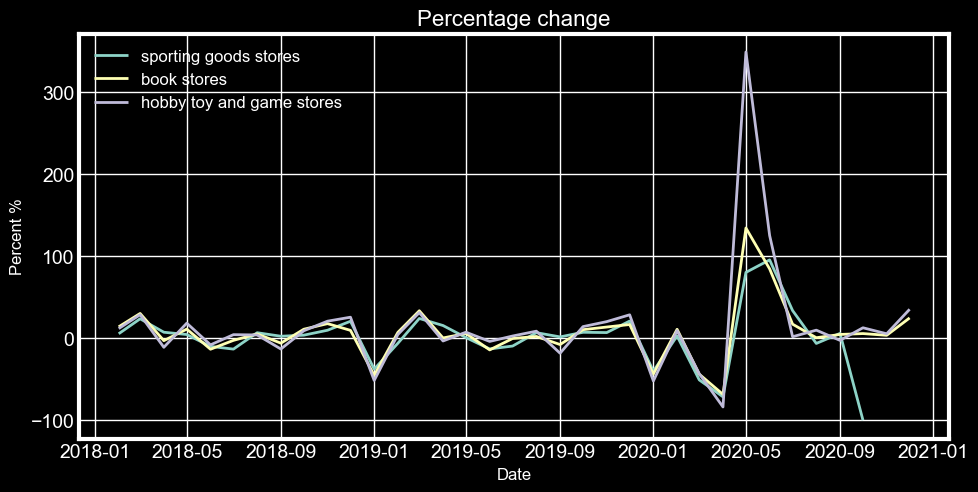

In [669]:
clothes = """
SELECT date, mens_clothing_stores, womens_clothing_stores, family_clothing_stores FROM year_2018
UNION
SELECT date, mens_clothing_stores, womens_clothing_stores, family_clothing_stores FROM year_2019
UNION
SELECT date, mens_clothing_stores, womens_clothing_stores, family_clothing_stores FROM year_2020
ORDER BY date;
"""

perc_ch_cl = pd.read_sql(clothes, con = mydb)

# finding percentage change

perc_ch_cl['mens_clothing_sales_pct_change'] = perc_ch_cl['mens_clothing_stores'].pct_change()
perc_ch_cl['womens_clothing_sales_pct_change'] = perc_ch_cl['womens_clothing_stores'].pct_change()
perc_ch_cl['family_clothing_sales_pct_change'] = perc_ch_cl['family_clothing_stores'].pct_change()

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

plt.title("Percentage change")
plt.xlabel("Date")
plt.ylabel("Percent %")

plt.plot(perc_ch_cl['date'], perc_ch_cl['mens_clothing_sales_pct_change'] * 100, label = 'sporting goods stores')
plt.plot(perc_ch_cl['date'], perc_ch_cl['womens_clothing_sales_pct_change'] * 100, label = 'book stores')
plt.plot(perc_ch_cl['date'], perc_ch_cl['family_clothing_sales_pct_change'] * 100, label = 'hobby toy and game stores')

plt.legend(fontsize=12)
plt.show() 

The graph shows that clothes are bought according to the seasons. A significant drop in sales is observed after the new year. The graph also shows that sales of all types of clothing increased significantly in May 2020. The reason for this fact needs to be established.

To analyze and produce graphs of rolling time windows let`s choose jewelry stores and grocery stores.

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\Asus\AppData\Local\Temp\ipykernel_17344\289615920.py:14: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')
  sma = comp_bus.rolling(3, win_type='gaussian').sum(std=3)


<function matplotlib.pyplot.show(close=None, block=None)>

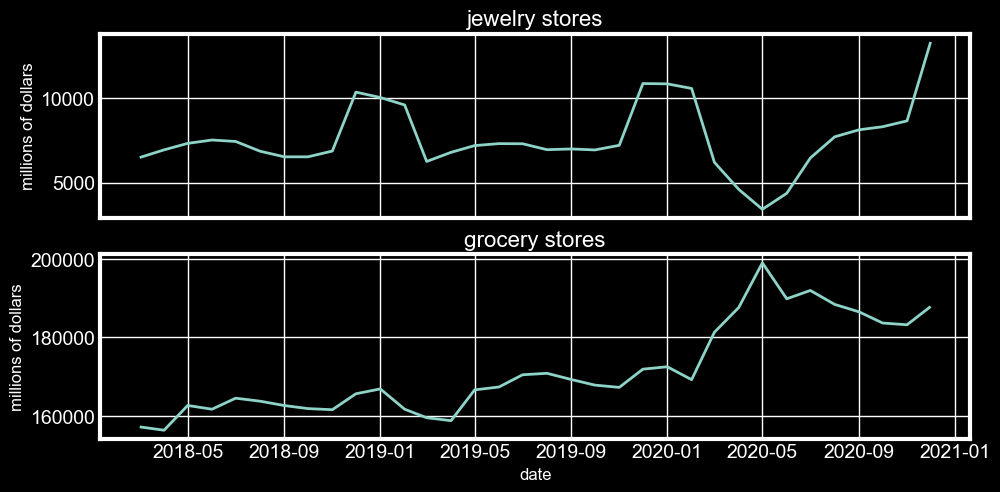

In [670]:
#rolling time windows
busineses = """
SELECT date, jewelry_stores, grocery_stores FROM year_2018
UNION
SELECT date, jewelry_stores, grocery_stores FROM year_2019
UNION
SELECT date, jewelry_stores, grocery_stores FROM year_2020
ORDER BY date;
"""

comp_bus = pd.read_sql(busineses, con = mydb)

#comp_bus.rolling(3, win_type='triang').sum()
sma = comp_bus.rolling(3, win_type='gaussian').sum(std=3)

fig, ax = plt.subplots(2, 
           sharex='col', sharey='row')

#f = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(5)

ax[0].plot(comp_bus['date'], sma['jewelry_stores'], label = 'jewelry stores')
ax[0].set(title='jewelry stores', ylabel='millions of dollars')

ax[1].plot(comp_bus['date'], sma['grocery_stores'], label = 'grocery stores')
ax[1].set(xlabel='date', ylabel='millions of dollars', title='grocery stores')

plt.show

Here we see that the sale of jewelry has a strong dependence on the holidays and the peak of these sales is in January. At the same time, there is no significant growth in sales from 2018 to 2020. In contrast, product sales are increasing every year. These sales grew especially strongly in 2020, which is likely due to the COVID epidemic. Shoppers stayed at home for a significant part of the time, which triggered an increase in food consumption. Here seasonality is also observed, which is an obvious fact.

### Close connection

In [671]:
# Close the connection

if (mydb.is_connected()):
    cursor.close()
    mydb.close()
    print('MySQL connection is closed')

MySQL connection is closed


### Conclusion

Thus, to solve the problem, we manually prepared the CSV files: cleared them of unnecessary information, prepared the data in the correct format.
Using Python, we connected to MI and created a database into which we imported the previously created files.
To analyze the data contained in the received data, queries were created that made it possible to obtain the necessary information. Graphs were built and conclusions were drawn from them.

### References

- Learner CARES 'How to import a CSV file into a MySQL database using Python'Python in Plain English URL: https://python.plainenglish.io/how-to-import-a-csv-file-into-a-mysql-database-using-python-script-791b051c5c33

- Handhika Yanuar Pratama 'Importing CSV Files Into MySQL Database Using Python' Python in Plain English URL: https://python.plainenglish.io/importing-csv-files-into-mysql-database-using-python-ce7938e47b44

-  Chris Moffitt 'Overview of Pandas Data Types' Practical Business Python URL: https://pbpython.com/pandas_dtypes.html

- "Python Data Science Handbook by Jake VanderPlas. Chapter 4. Visualization with Matplotlib" URL: https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

- Byron Dolon "Don’t Miss Out on Rolling Window Functions in Pandas" Towards Data Science URL: https://towardsdatascience.com/dont-miss-out-on-rolling-window-functions-in-pandas-850b817131db